
 # 深度学习基础与Pytorch实现

>【引言】[上一篇文章](https://blog.csdn.net/keypig_zz/article/details/124778366)介绍了深度许学习中的梯度优化相关理论及Python实现。但是什么样的函数拟合能力强，还能很容易求解它的梯度呢？那便是神经网络了。介绍神经网络的资料应该是相当丰富了，这里力求以 **必要最小** 的原则进行介绍，希望读者能够通过本文以及接下来两篇文章掌握深度强化学习所需的深度学习必要知识。
>- [x] **本文介绍神经网络基础知识：全连接神经网络、Pytorch深度学习框架、神经网络的训练和调优等。保持以往文章的风格，本文将给出代码。**


---



# 1 人工神经网络基础知识
## 1.1 人工神经元模型
<font color='red'>人类：“向大自然学习！”</font>

<font color='green'>青蛙：“蛤？”</font>

据说科学家从青蛙的神经元得到启示发明了人工神经元，二者对比如下：
>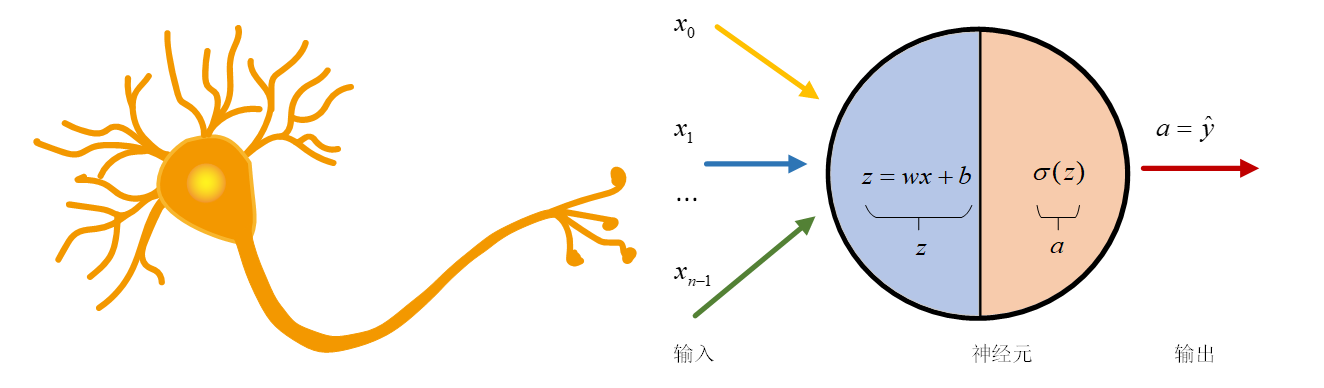
><center> <b>图1</b> 动物神经细胞(左)与人工神经元(右)（这图我画的，勿偷）</center>

据说青蛙的某种神经元，只有当出入的刺激超过某个阈值，才会有输出。据此，人们发明了图1右侧所示的人工神经元。神经元的输入为$n$维向量$$x=(x_0,x_1,\cdots,x_{n-1})^\top$$先经过线性变换$$z=w^\top x+b$$然后经过非线性变换$$a=\sigma(z)$$就得到了输出。这里的$w=(w_0,w_1,\cdots,w_{n-1})^\top$是与输入维度相同的权重(weight)向量，$b\in\mathbb{R}$是偏置(bias)参数。

>- [x] Note that： <font color='red'>注意这里的变量，向量依然是小写字母，向量默认都是列向量。人工智能领域的文献中，一个变量是否为向量或者矩阵，需要从上下文推断，这一点很多其他领域的人觉得很不严谨。仔细核对变量的维度以及运算前后维度的变化，这是保证神经网络运行正确的有效检测手段。</font>



### 1.1.1 激活函数

激活函数是一个非线性函数，提供了神经元非线性表征能力。常见的激活函数有 **sigmoid、tanh、relu** 等。
>- **sigmoid函数**的表达式为$$\sigma(x)=\frac{1}{1+e^{-x}}$$它的函数曲线及导函数的曲线如下：
>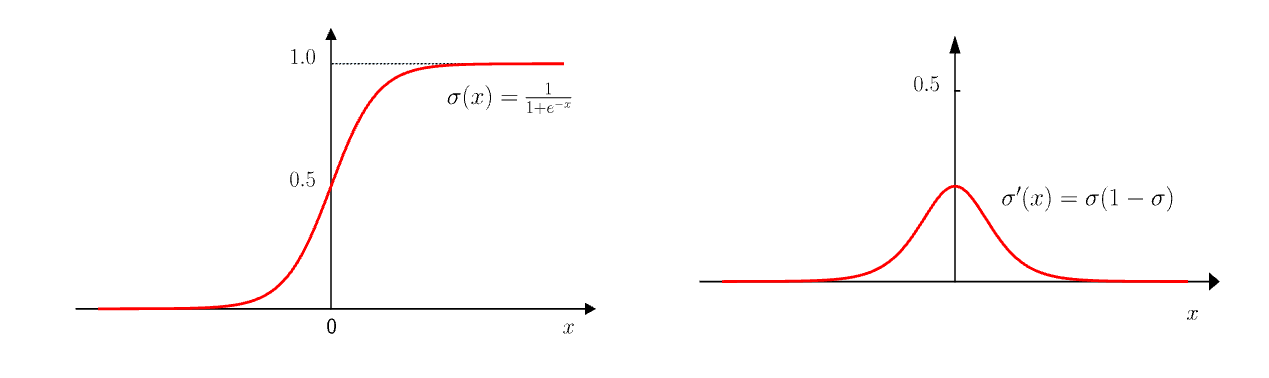
**tanh函数**的表达式为$$\tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$曲线如下
>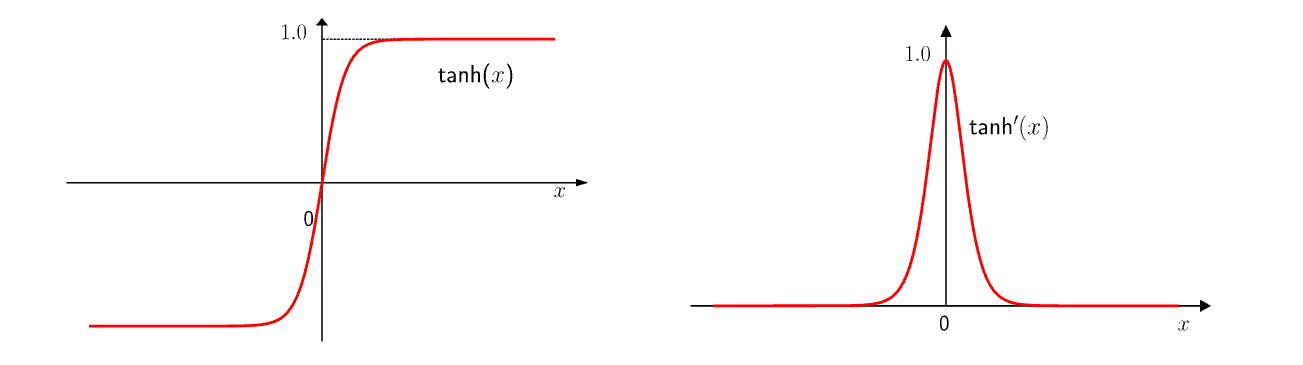
>- **relu函数**的表达式为$$\text{relu}(x)=\begin{cases}x,\quad\text{if }x\ge 0\\0,\quad\text{otherwise}\end{cases}$$曲线如下
>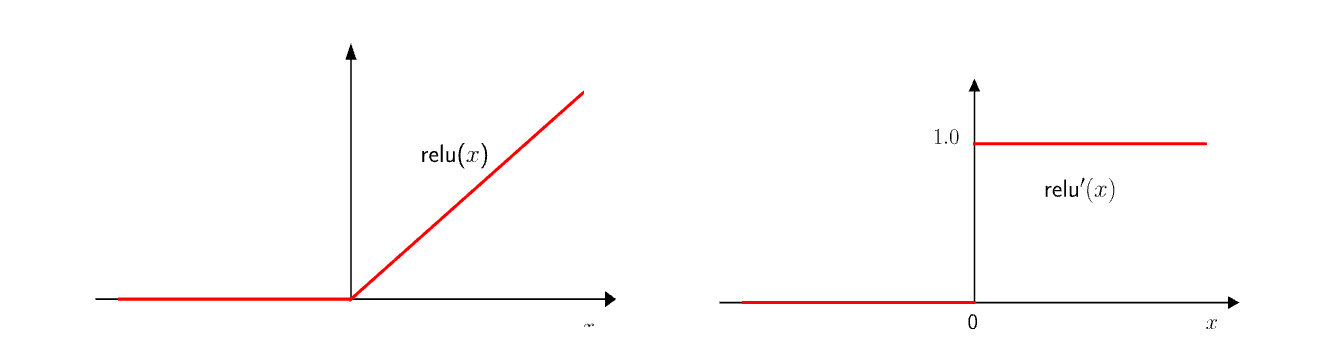

这几个激活函数用的都挺多，在实际中，可以都试试，从速度，有效性等方面进行选择即可。

## 1.2 人工神经网络
前面介绍的人工神经元，多个组合在一起，就形成了人工神经网络(Artificial Neural Network, ANN)。

<font color='blue'>用来神经网络来干啥呢？这里用回归问题来说明。</font>

假设数据集$X$包含$m$个样本，即$X=\{x^0,x^1,\cdots,x^{m-1}\}$；每个样本包含$n$个维度，即$x^i=(x^i_0,\cdots,x^i_{n-1})$。每个样本对应标签值为$Y=\{y^0,y^1,\cdots,y^{m-1}\}$。

<font color='blue'>现在的任务是设计一个神经网络来拟合数据集与标签集之间的映射关系。</font>


这里先画一个两层的神经网络玩玩。
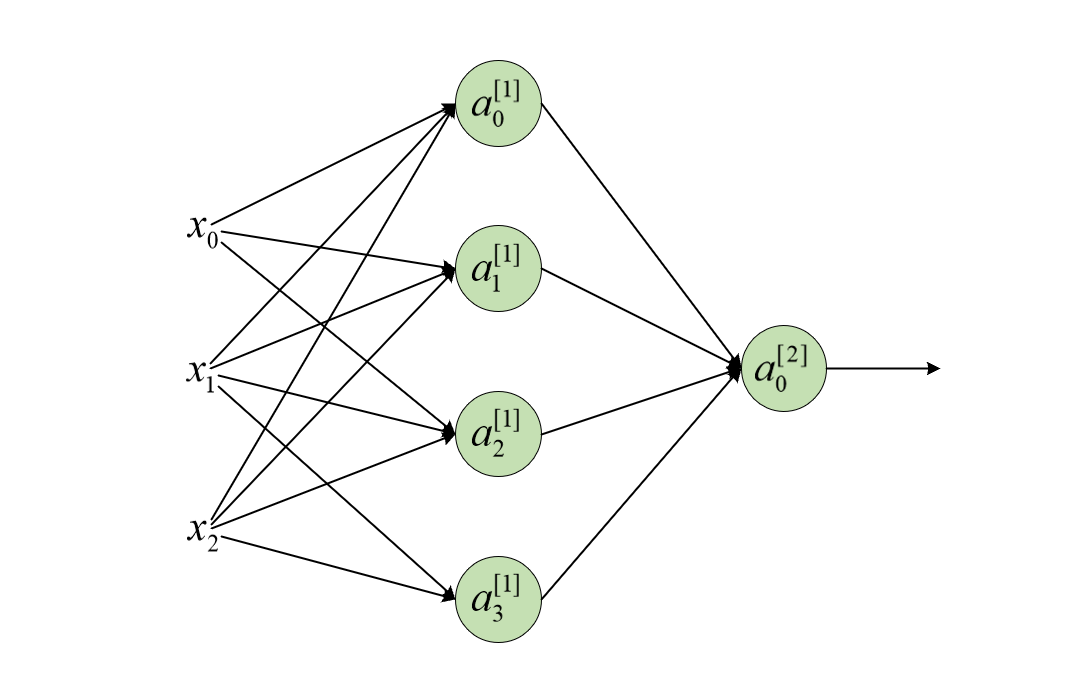
<center> <b>图2</b> 一个包含两个全连接层的神经网络</center>

看清楚了吧，激活函数的输出，$a_2^{[1]}$表示第1层神经网络的第2个神经元的输出。

### 1.2.1 数据的前向流动(Feedforward/Forward)
将数据扔到图2中的神经网络中，会输出啥？

那就顺着图计算一遍。


<font color='blue'>先算第1层的4个神经元的输出。</font>

根据图1中的神经元模型，可知：
$$z_0^{[1]}=w_0^{[1]\top}x+b_0^{[1]},\quad a_0^{[1]}=\sigma(z_0^{[1]})$$这里面的$w_0^{[1]}$是一个列向量，和$x$的维度一致，表示第1层第0个神经元的权重参数。$b_0^{[1]}\in\mathbb{R}$，表示表示第1层第0个神经元的偏置参数。将第1层的权重参数放在一起为$W^{[1]}=\left[w^{[1]}_0,w^{[1]}_1,w^{[1]}_2,w^{[1]}_3\right]$，这是一个$3\times 4$的矩阵。将第1层的偏置参数放在一起形成偏置向量$b^{[1]}=(b^{[1]}_0,b^{[1]}_1,b^{[1]}_2,b^{[1]}_3)^\top$，这是一个4维的向量。

其他三个神经元的输出分别为：

$$\begin{aligned}z_1^{[1]}=w_1^{[1]\top}x+b_1^{[1]},\quad a_1^{[1]}=\sigma(z_1^{[1]})\\
z_2^{[1]}=w_2^{[1]\top}x+b_2^{[1]},\quad a_2^{[1]}=\sigma(z_2^{[1]})\\
z_3^{[1]}=w_3^{[1]\top}x+b_3^{[1]},\quad a_3^{[1]}=\sigma(z_3^{[1]})\end{aligned}$$
把这4个神经元的输出放到一起，用$a^{[1]}=\left(a_0^{[1]},a_1^{[1]},a_2^{[1]},a_3^{[1]}\right)^\top$表示。

<font color='blue'>然后算第2层的1个神经元的输出。</font>

第2层只有一个神经元：
$$z_0^{[2]}=w_1^{[2]\top}a^{[1]}+b_0^{[2]},\quad a_0^{[2]}=\sigma(z_0^{[2]})$$

神经网络的输出用$\hat{y}$表示，即$\hat{y}=a^{[2]}_0$，表示预测值或者预测标签。

### 1.2.2 误差的反向传播(Backpropagation)
反向传播，其实和[上一篇文章](https://blog.csdn.net/keypig_zz/article/details/124778366)中的梯度计算没什么两样。如果你上一篇文章看懂了，那么反向传播肯定也能看懂。

神经网络的预测值$y$和真实的函数值$\hat{y}$之间相差多少？

来，损失函数测量一下！

$$\mathcal{L}=(\hat{y}-y)^2=(a^{[2]}_0-y)^2$$

损失函数里面包含的参数为$W^{[1]},b^{[1]},w^{[2]},b^{[2]}$。接下来分别求解损失函数对这些参数的梯度。

$$\begin{aligned}\nabla_{w^{[2]}}\mathcal{L}&=2\cdot {\color{red}{(a^{[2]}_0-y)}} \cdot\nabla_{w^{[2]}} a^{[2]}_0\\
&=2\cdot  {\color{red}{(a^{[2]}_0-y)}}\cdot\nabla_{w^{[2]}} \sigma\left(z_0^{[2]}\right)\end{aligned}$$
到此，我们分析一下上面这个式子的右边部分。$\sigma(\cdot)$函数很容易求导：$\sigma^\prime=\sigma(1-\sigma)$。因此有：
$$\begin{aligned}\nabla_{w^{[2]}}\mathcal{L}&=2\cdot {\color{red}{(a^{[2]}_0-y)}} \cdot\sigma(z_0^{[2]})\left(1-\sigma(z_0^{[2]})\right)\cdot \nabla_{w^{[2]}} z_0^{[2]}\\
&=2\cdot {\color{red}{(a^{[2]}_0-y)}}\cdot\sigma(z_0^{[2]})\left(1-\sigma(z_0^{[2]})\right)\cdot a^{[1]}\end{aligned}$$
上面就是第2层神经网络权重参数的梯度了，表达式中的每一项都可以通过数据前馈过程的中间结果直接计算出来。

同理，偏置参数$b$，以及第1层神经网络的梯度也可以这样计算出来。

注意上面推导中${\color{red}{(a^{[2]}_0-y)}}$这一项，它也可以写成${\color{red}{(\hat{y}-y)}}$，这是预测值是真实值的差，即 **误差** 。梯度的表达式中包含了误差，这就像误差沿着神经网络**反向传播**了。可以看下面这个图：

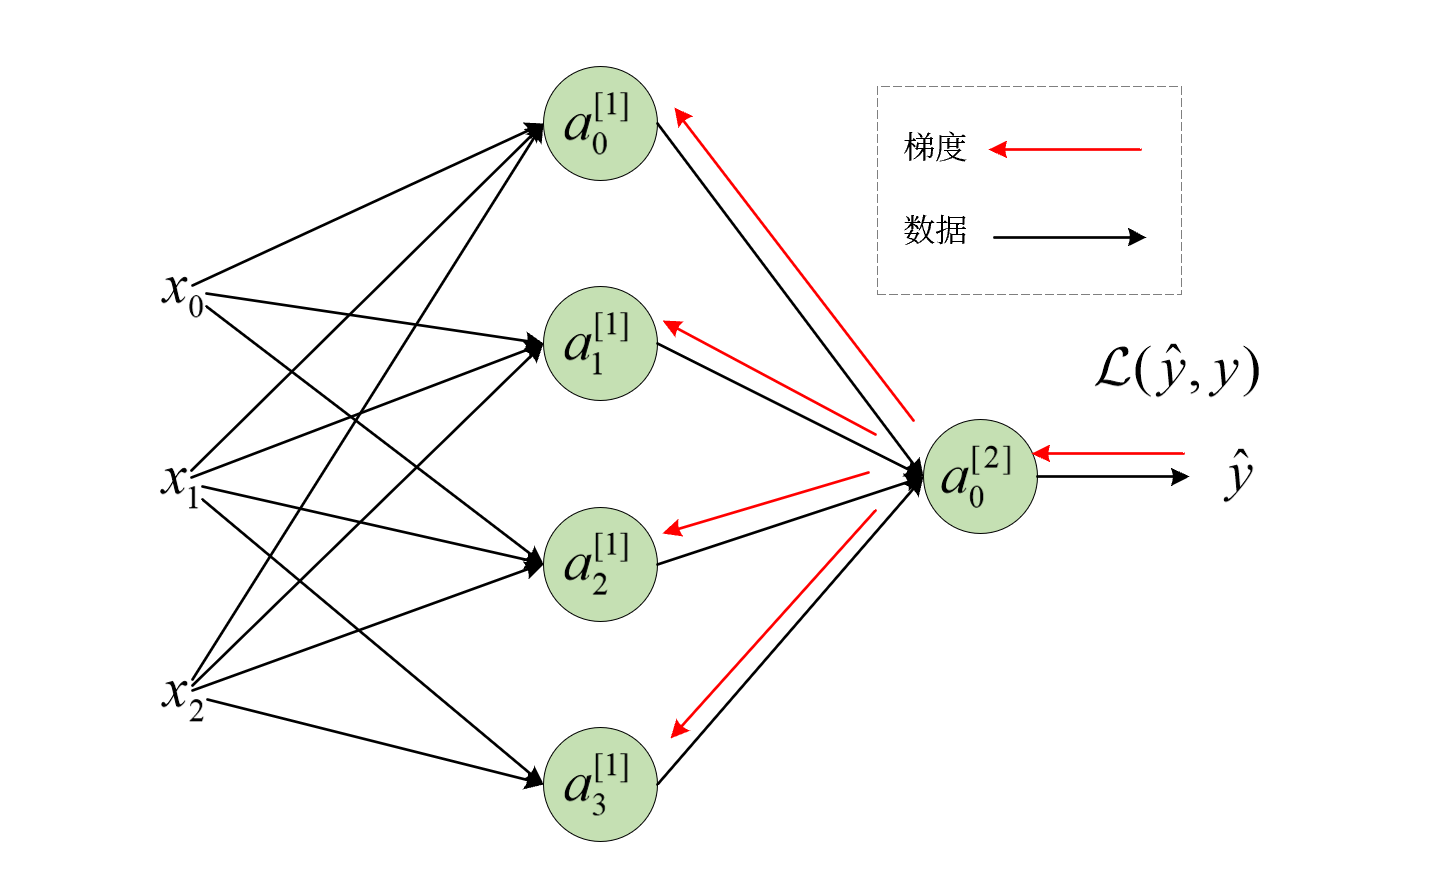

<center> <b>图3</b> 数据前向流动与损失函数梯度反向传播</center>

损失函数关于神经网络关于中的参数的梯度都是可以求解的，得到梯度后，利用梯度下降就可以优化神经网络参数啦。是不是感觉自己可以开发一个深度学习框架了？简直不可思议的牛逼。

<font color='blue'>好了，以上就是最基本的神经网络知识了。</font>

<font color='blue'>但是，很显然，我们没必要去重复造轮子，已经有很多成熟的深度学习框架了。比如，Pytorch。不太了解的可以自行百度。我觉得它的流行主要是易于使用，大量学术界的人可以用它快速开发出模型，验证想法。节省时间，拯救生命。</font>

# 2 Pytorch深度学习实战
## 2.1 Pytorch安装


- [这里是官方安装指南](https://pytorch.org/get-started/locally/)
- 在windows下安装很简单。在linux下，注意N卡驱动的正确安装，一般也不会出问题。
- 使用linux系统的强化学习初学者强烈建议安装cpu版本，如果Nvidia显卡驱动安装有问题，墙裂建议安装cpu版本的Pytorch。在强化学习领域，很多入门的问题GPU完全用不着。
- 另外，如果不用Python的多线程方面的技术，就使用Windows吧，很多初学者光适应Linux系统就头很大了。。。（我自己是多台电脑，一些装Windows，另外一些Ubuntu）
- 如果觉得安装下载慢，可以使用国内的源，如中科大或清华的源：<font color='blue'>pip install torch torchvision -i https://pypi.mirrors.ustc.edu.cn/simple/ </font>


## 2.2 Pytorch中神经网络构建和训练的主要工具
[Pytorch官方文档写的很详细，还有教程，遇到啥不明白的就去查一查。](https://pytorch.org/docs/stable/index.html)
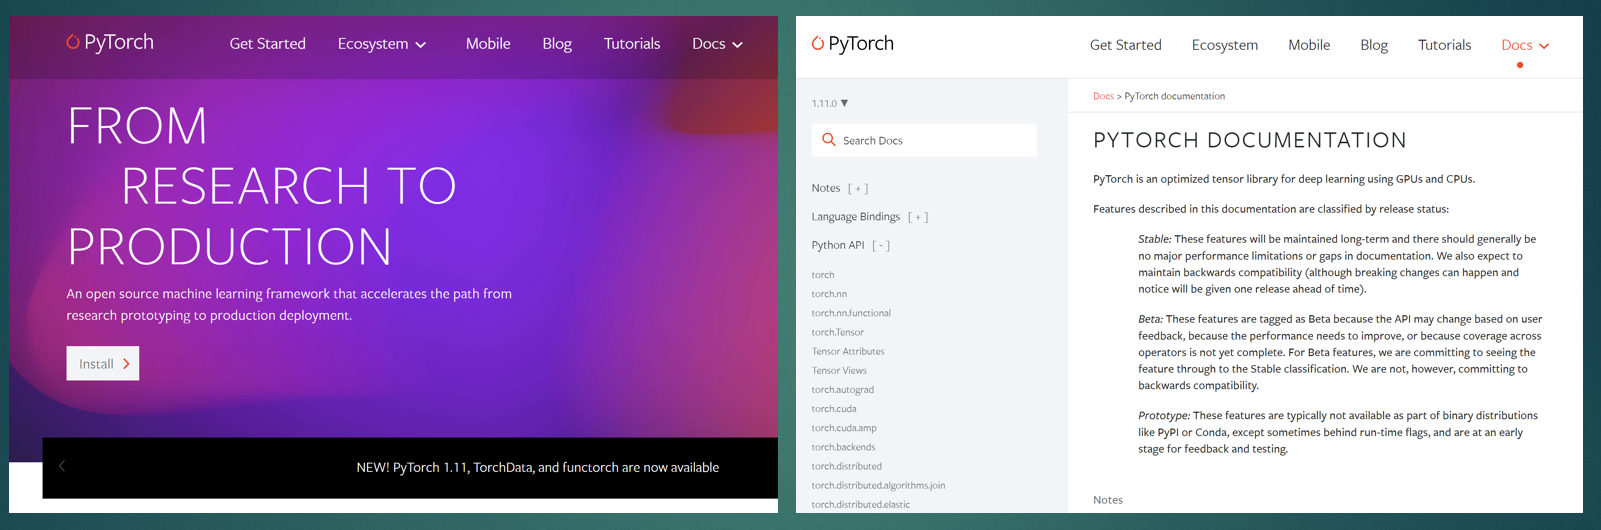


### 2.2.1 变量与运算

In [1]:
# 导入Pytorch库
import torch
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu' # 有GPU就用
print(f"Using {device}")

Using cuda


- 定义两个张量(tensor)，并相加:

In [2]:
a = torch.tensor([7, 8,9]) # 定义数据,，默认放在CPU上计算
print('a: ',a)

b = torch.tensor([1,2,3]).to(device) # 定义数据并放在GPU上计算
c = torch.tensor([4,5,6]).to(device)
print('b+c: ',b+c)



a:  tensor([7, 8, 9])
b+c:  tensor([5, 7, 9], device='cuda:0')


- 定义一些特殊结构张量：

In [3]:
a = torch.ones(2,4) #全1
print('a: ',a)
b = torch.zeros(2,4).to(device) #全0
print('b: ',b)
c = torch.eye(4,4) #对角单位阵
print('c: ',c)
c = c.reshape(2,-1) # 改变形状
print('c reshaped: ',c.shape)

a:  tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
b:  tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], device='cuda:0')
c:  tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
c reshaped:  torch.Size([2, 8])


- 访问tensor变量

In [4]:
a = torch.tensor([[1,2,3],
                 [4,5,6],
                 [7,8,9]])
print(a[0]) # 第0行
print(a[0][0]) # 第0行第1个元素
print(a[0,0])
print(a[:,0]) # 取所有行的第0列
print(a[:2,:2])# 取前2行和前2列

tensor([1, 2, 3])
tensor(1)
tensor(1)
tensor([1, 4, 7])
tensor([[1, 2],
        [4, 5]])


### 2.2.2 torch.nn模块——Pytorch中的各种网络组件

torch.nn包含许多常见的模块用于构建各种各样的神经网络模型：

Containers、**Convolution Layers**、Pooling layers、Padding Layers、Non-linear Activations (weighted sum, nonlinearity)、Non-linear Activations (other)、Normalization Layers、**Recurrent Layers**、Transformer Layers、**Linear Layers**、Dropout Layers、Sparse Layers、Distance Functions、**Loss Functions**、Vision Layers、Shuffle Layers、DataParallel Layers (multi-GPU, distributed)、Utilities、Quantized Functions、Lazy Modules Initialization


其中**线性层(Linear Layers)、卷积层(Convolution Layers)、循环层(Recurrent Layers)、损失函数(Loss Functions)**等使用的比较多的。

- Linear Layers就是全连接层，一般用于输入embedding或者输出前的整合，完成$z=w^\top x+b$这个线性运算，后面视情况是否接激活函数。
- Convolution Layers一般用于设计处理图像的神经网络
- Recurrent Layers包括RNN、GRU、LSTM等，一般用于自然语言处理或处理时序相关的任务。在强化学习中，对抗部分可观测环境（POMDP）带来的挑战，也会使用循环神经网络来处理观测历史，这在多智能体强化学习中是很常见的。
- Loss Functions包含了常见的损失函数，如均方误差、交叉熵损失等，强化学习中一些策略梯度类的算法，损失函数的推导比较关键。

### 2.2.3 torch.optim——Pytorch中的优化工具(SGD、Adam、...)

torch中将常见的优化算法封装在torch.optim这个模块中，如SGD，Adam， RMSprop等。

构建网络和优化网络的工具都介绍完了，就可以动手搭建一个网络取解决一个实际问题了。

## 2.3 使用神经网络预测波士顿房价
这里举一个例子来说明神经网络的实际使用方法。这个例子虽然短小，但是包含了神经网络构建和优化的全部内容，在实际的科研或者开发问题中，更多的复杂性来自特征工程或者网络结构设计以及调参，但使用深度学习解决问题的思路都是一样的。


<font color='red'><b>任务：波士顿房价预测</b></font>

<b>房子的价格因素有很多，比如房子的面积，小区环境，交通是否便利，治安情况等等。现在给出了波士顿地区506组房价数据，包含影响房价的13种因素以及对应的房价。任务是找出因素与房价之间的对应关系。</b>

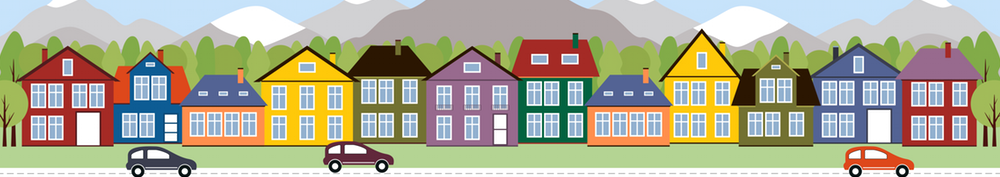
图片来源：kaggle比赛官网

### 2.3.1 数据组织

这里要用到sklearn这个工具，里面包含了波士顿房价预测问题的数据集。

使用`pip install sklearn`这条命令即可安装。

In [5]:
from sklearn.datasets import load_boston
# 载入波士顿房价数据
raw_data = load_boston()
X = raw_data['data']
Y = raw_data['target']
print(X.shape, Y.shape)


(506, 13) (506,)


数据预处理：将数据归一化，并划分训练集和预测集。

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(X) # 将特征数据归一化
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) # 将数据集划分为训练集和测试集

x_train = torch.tensor(x_train, dtype=torch.float32).to(device) # 将变量转换为torch中的tensor类型，并指定计算设备
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)


### 2.3.2 网络定义



定义一个简单的全连接神经网络，也成为多层感知器(MLP)。这个网络主要包含三个部分：输入层、隐藏层、输出层。

在构建过程中，主要使用torch.nn模块。

- nn.Linear()实现输入到输入的线性变换。

- nn.ReLU()实现激活函数的功能。

- nn.Sequential()可以实现模块的组合和封装。我们自己定义的网络，如果继承自nn.Module这个类，那么也可以放在nn.Sequential()和别的网络一起封装。

然后，定义一个forward函数，指定数据前向流动的过程。

In [7]:
import torch.nn as nn

class Net(nn.Module): # 一般建议继承nn.Module这个类，便于使用nn.Sequential进一步封装
    """一个简单的全连接神经网络"""

    def __init__(self):
        super(Net, self).__init__()  # 初始化父类

        self.input_layer = nn.Linear(13, 30) # 输入层
        self.activation_layer = nn.ReLU()
        self.hidden_layers = nn.Sequential( # 隐藏层
            nn.Linear(30, 10),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(10, 1) # 输出层

    def forward(self, x): # 指定数据如何前向流动
        x = self.input_layer(x)
        x = self.activation_layer(x)
        x = self.hidden_layers(x)
        x = self.output_layer(x)
        return x

### 2.3.3 网络训练
在训练集上训练模型

- 定义网络模型

In [8]:
model = Net().to(device) # 定义网络模型
print(model)

Net(
  (input_layer): Linear(in_features=13, out_features=30, bias=True)
  (activation_layer): ReLU()
  (hidden_layers): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): ReLU()
  )
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)


- 定义优化工具

In [9]:
# 定义优化工具
from torch.optim import Adam
optimizer = Adam(params=model.parameters(), lr=1e-4)
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)


- 开始训练

In [10]:
loss_list = []
for i in range(20000):

    y_hat = model.forward(x_train)

    loss = torch.mean(torch.square(y_hat-y_train.squeeze()))
    # loss = loss_fn(y_hat, y_train.squeeze())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        loss_list.append(loss)
        print(f'Epoch:{i},  loss: {loss:>7f}')



Epoch:0,  loss: 586.864807
Epoch:1000,  loss: 429.710602
Epoch:2000,  loss: 128.313477
Epoch:3000,  loss: 94.260094
Epoch:4000,  loss: 88.643105
Epoch:5000,  loss: 85.089569
Epoch:6000,  loss: 83.451485
Epoch:7000,  loss: 82.737610
Epoch:8000,  loss: 82.310730
Epoch:9000,  loss: 81.940407
Epoch:10000,  loss: 81.553680
Epoch:11000,  loss: 81.160172
Epoch:12000,  loss: 80.778908
Epoch:13000,  loss: 80.419617
Epoch:14000,  loss: 80.136871
Epoch:15000,  loss: 79.979126
Epoch:16000,  loss: 79.923973
Epoch:17000,  loss: 79.915054
Epoch:18000,  loss: 79.914703
Epoch:19000,  loss: 79.914703


- 画损失函数曲线

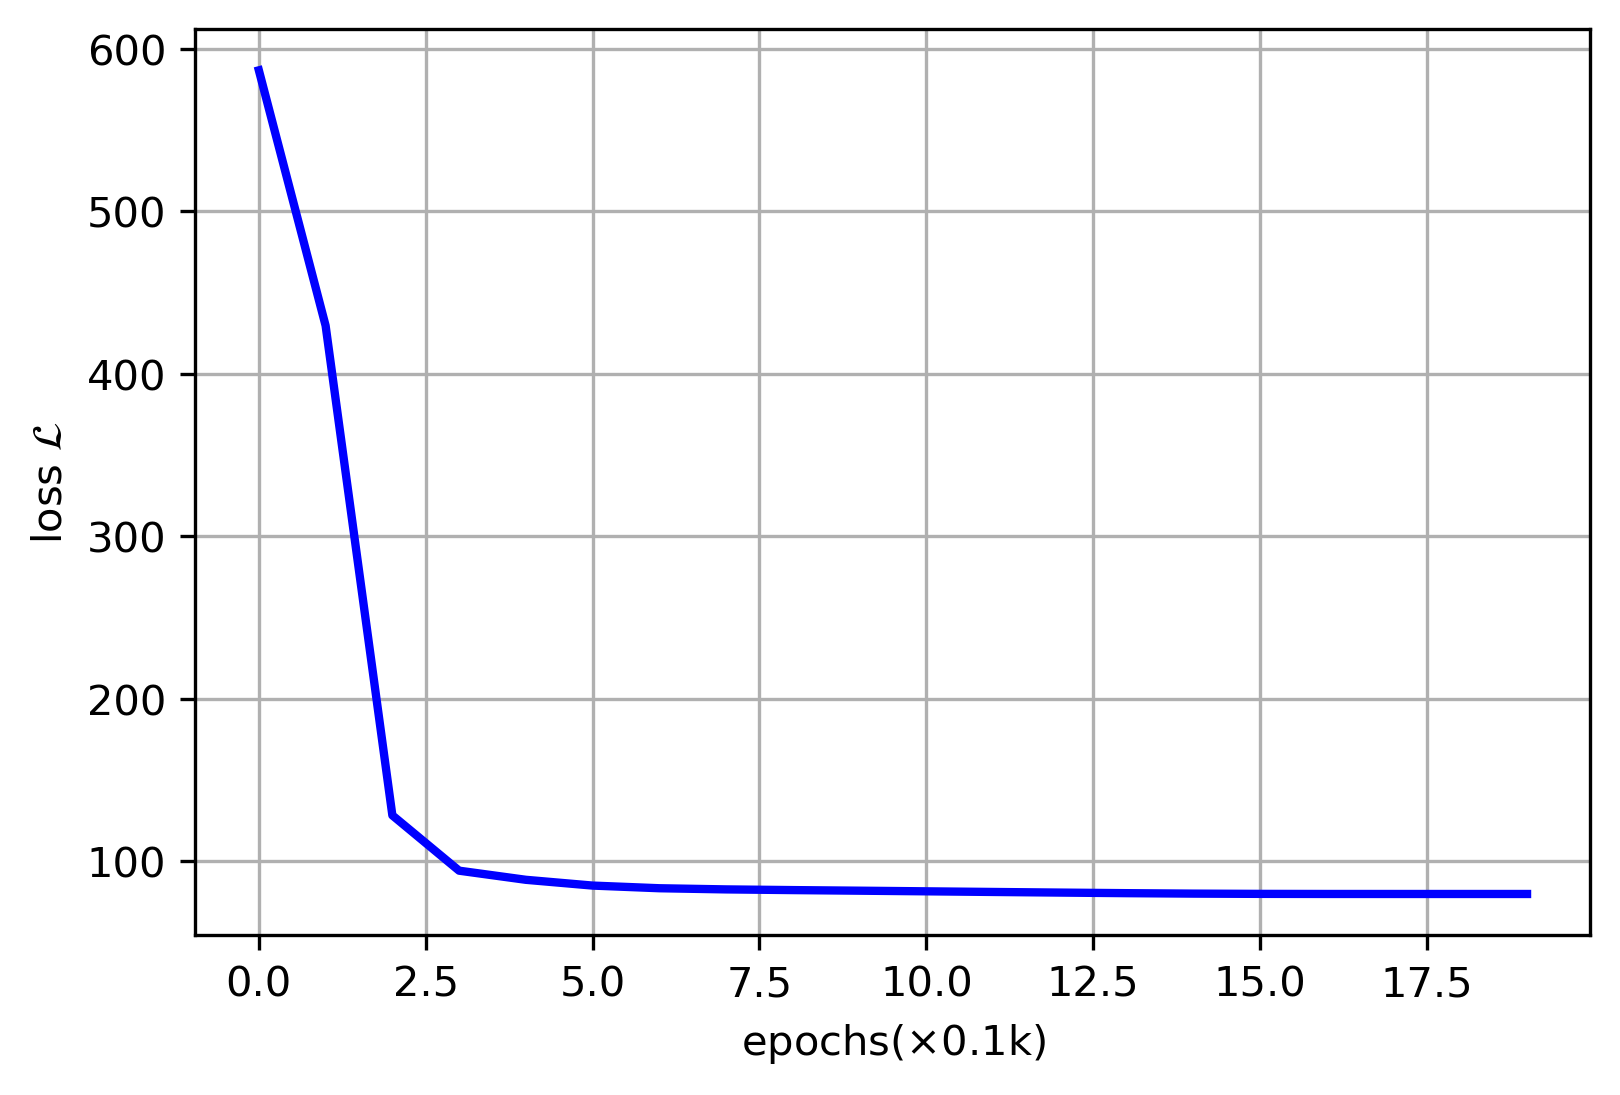

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,4), dpi=300)
plt.plot(loss_list, 'b', linewidth=2.0)
plt.grid(True)
plt.xlabel(r'epochs($\times$0.1k)')
plt.ylabel(r'loss $\mathcal{L}$')
plt.show()

- 保存模型：保存模型或者保存模型参数

In [17]:
# 保存网络模型
torch.save(model, 'model.pkl')
# 保存网络参数
torch.save(model.state_dict(), 'model_par.pkl')

del model

### 2.3.3 网络训练
在测试集上对模型进行测试

- 加载网络

In [21]:
model1 = torch.load('model.pkl')
model2 = Net()
model2.load_state_dict(torch.load('model_par.pkl'))

<All keys matched successfully>

在测试集上测试预测准确性。

In [24]:
with torch.no_grad():
    y_hat_test1 = model1.forward(x_test)
    y_hat_test2 = model1.forward(x_test)
    loss_test1 = torch.mean(torch.square(y_hat_test1-y_test.squeeze()))
    loss_test2 = torch.mean(torch.square(y_hat_test2-y_test.squeeze()))

print(loss_test1)
print(loss_test2)
    

tensor(102.4642, device='cuda:0')
tensor(102.4642, device='cuda:0')


# 总结

- 介绍了基本的神经网络知识，这部分内容的数学推导是十分直观的。
- 介绍了Pytorch这一优秀的深度学习框架。
- 实战：基于Pytorch的深度学习预测波士顿房价。演示了使用神经网络解决实际问题的全流程。
